In [2]:
#importing the modules
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#viualsation modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic_df=pd.read_csv("train.csv")

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB



The big question: What factors may have influenced the survival chance
Some areas to investigate:
maybe having family onboard could have helped with the survival of the family.
In contrast having children may have reduced the chance of the survival of some adults.
as they try to save their childrens or siblings.
Age can a a factor that could affect survival chance.
Sex could be also a factor.


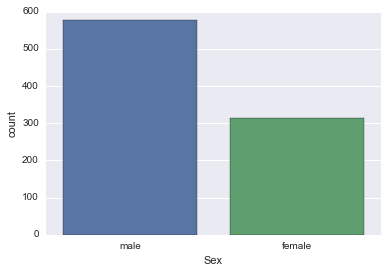

In [6]:
#Let's check out ratio of number of pasenger accoring to gender using factorplot
sns.countplot('Sex',data=titanic_df)

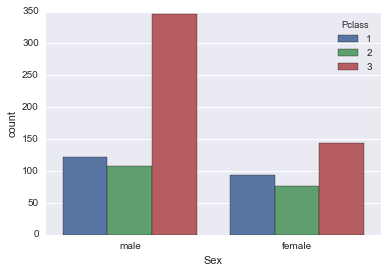

In [7]:
#seperate gender by classes
sns.countplot("Sex",data=titanic_df,hue="Pclass")

#The graph above shows that most male and female passenger were from third class

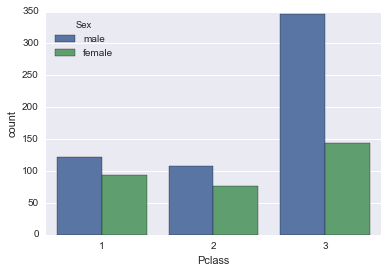

In [8]:
#now sepearte by class and havemale and female legend
sns.countplot("Pclass",data=titanic_df,hue="Sex")

In [9]:
def male_female_child(passenger):
    age,sex=passenger
    
    if age<16:
        return "child"
    else:
        return sex

In [10]:
titanic_df["person"]=titanic_df[["Age","Sex"]].apply(male_female_child,axis=1)

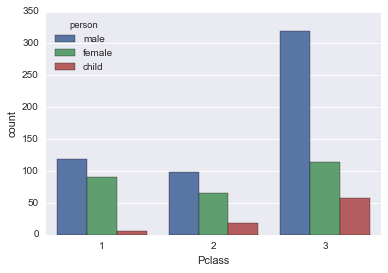

In [11]:
sns.countplot("Pclass",data=titanic_df,hue="person")

#So more childredn in third class as oppossed to more childredn in first (pampered ones) 

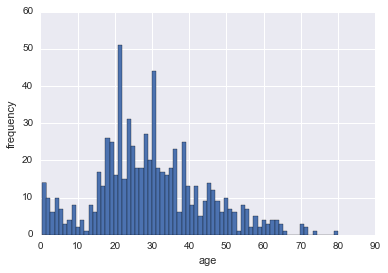

In [12]:
#making histogram of age distribution
titanic_df["Age"].hist(bins=70)
plt.xlabel("age")
plt.ylabel("frequency")

In [13]:
#Calculting mean age
titanic_df["Age"].mean()

29.69911764705882

In [14]:
#calculating unique values to find aobut number of children, male and female
titanic_df["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

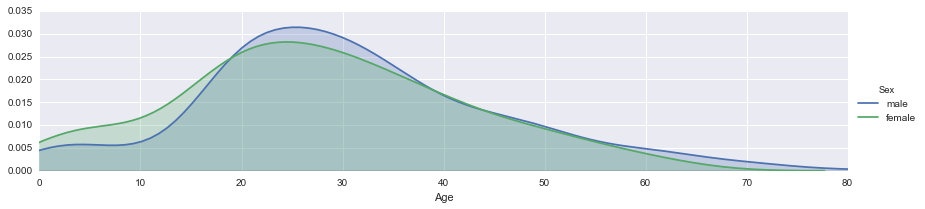

In [15]:
fig=sns.FacetGrid(titanic_df,hue="Sex",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)

oldest=titanic_df["Age"].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

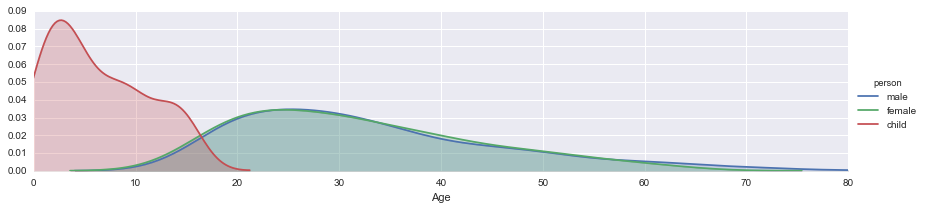

In [16]:
fig=sns.FacetGrid(titanic_df,hue="person",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)

oldest=titanic_df["Age"].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

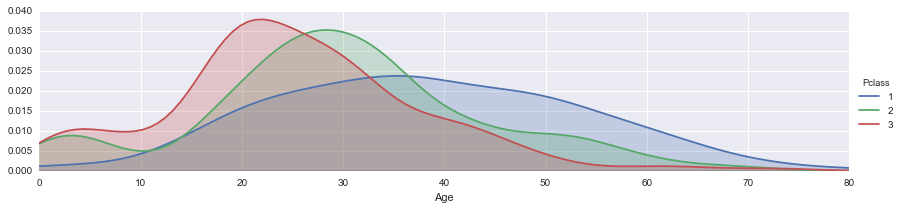

In [17]:
fig=sns.FacetGrid(titanic_df,hue="Pclass",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)

oldest=titanic_df["Age"].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

In [18]:
#what deck were the passenger an and how does it relate to the class
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [19]:
deck=titanic_df["Cabin"].dropna()

In [20]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

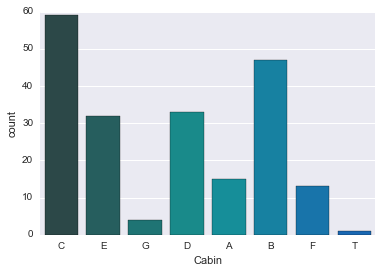

In [21]:
levels=list()

for level in deck:
    levels.append(level[0])
    
cabin_df=DataFrame(levels,columns=["Cabin"])

sns.countplot("Cabin",data=cabin_df,palette="winter_d")

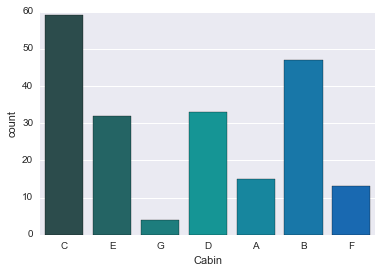

In [22]:
cabin_df=cabin_df[cabin_df.Cabin !="T"]
sns.countplot("Cabin",data=cabin_df,palette="winter_d")

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


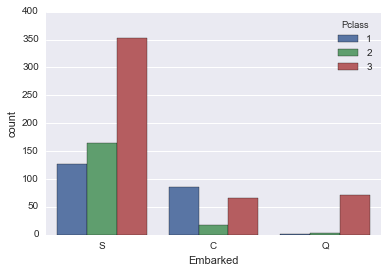

In [24]:
#where did the passengers come from
sns.countplot("Embarked",data=titanic_df,hue="Pclass")

In [25]:
#who was alone and who was with their family
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [26]:
#create a new column to define alone
titanic_df["Alone"]=titanic_df.SibSp+titanic_df.Parch

In [27]:
titanic_df["Alone"]

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [28]:
titanic_df["Alone"].loc[titanic_df["Alone"]>0]="With Family"
titanic_df["Alone"].loc[titanic_df["Alone"]==0]="Alone"

c:\python3.5\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


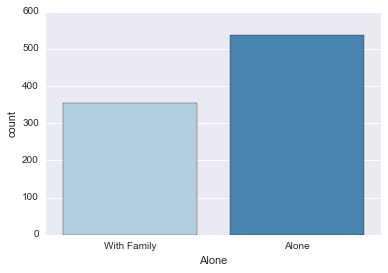

In [30]:
sns.countplot("Alone",data=titanic_df,palette="Blues")

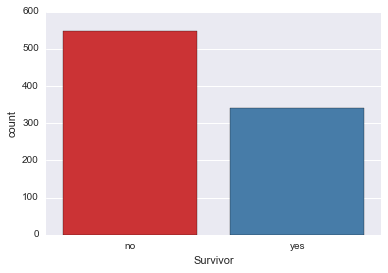

In [31]:
titanic_df["Survivor"]=titanic_df.Survived.map({0:"no",1:"yes"})

sns.countplot("Survivor",data=titanic_df,palette="Set1")

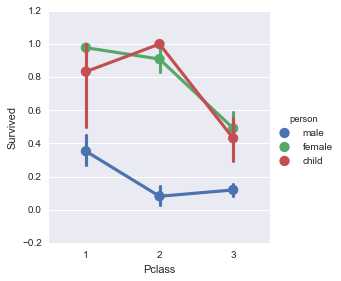

In [32]:
#let's see if class was a factor that affected survival
sns.factorplot("Pclass","Survived",hue="person",data=titanic_df)

# So we can see that being a male decreases your chances of survival
#We can also see that male of 3rd class have lowest number of survival

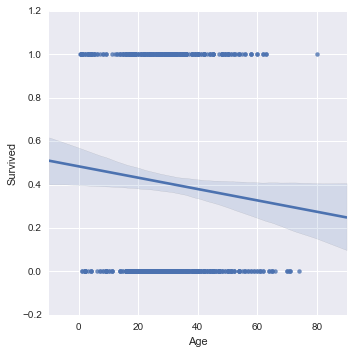

In [33]:
#lets see if age was a factor affecting the survivor
#can use linear plot of age vs survival
#use lmplot
sns.lmplot("Age","Survived",data=titanic_df,palette="Blues")

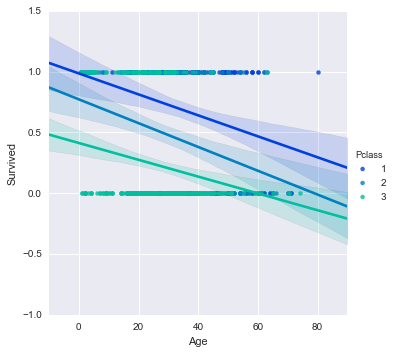

In [34]:
#check if the class has any affect 
sns.lmplot("Age","Survived",data=titanic_df,hue="Pclass",palette="winter")

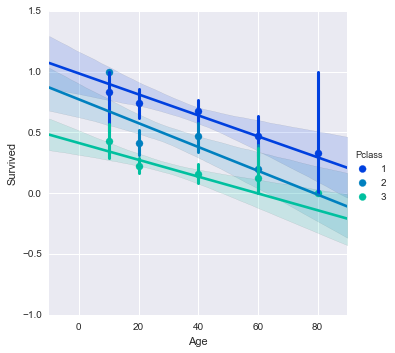

In [35]:
generations=[10,20,40,60,80]
sns.lmplot("Age","Survived",hue="Pclass",data=titanic_df,palette="winter",x_bins=generations)

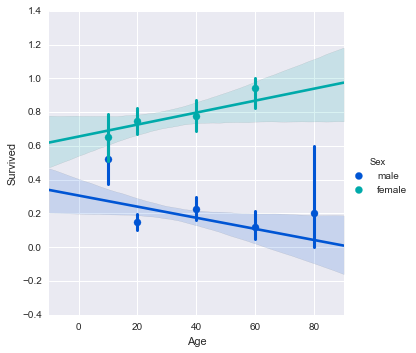

In [36]:
#lets see how gender and age relate to survival
sns.lmplot("Age","Survived",hue="Sex",data=titanic_df,palette="winter",x_bins=generations)

In [37]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,no
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,yes


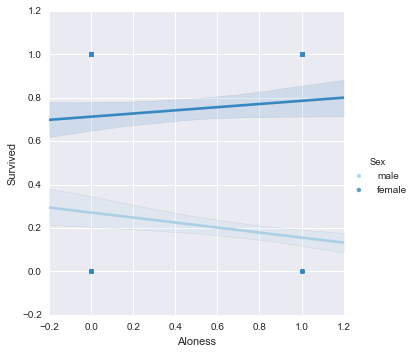

In [43]:
titanic_df["Aloness"]=titanic_df.Alone.map({"Alone":1,"With Family":0})
sns.lmplot("Aloness","Survived",data=titanic_df,palette="Blues",hue="Sex")

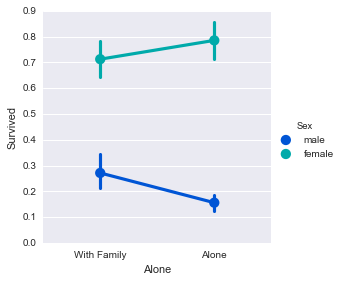

In [49]:
sns.factorplot("Alone","Survived",palette="winter",data=titanic_df,hue="Sex")